# <center> Association Rule Mining </center>

## Agenda

* Association Rules
    * What is an association rule? 
        * Item, Itemset, Antecedent and Consequent
    * Measuring strength of a rule
* Data reading and preparation
* Generating Frequent Itemset
* Association rule mining
    * Generating the rules
    * Exploration with various filters
    * Analyzing and finding patterns

__Association Rules__ is an unsupervised technique to extract pattern or relation between items. The rule defines association between A and B as A => B i.e if A is purchased B is also purchased. 

An association rule consists of an antecedent and a consequent.

$${\{Pen, Pencil\}} \to \{Paper\}$$
$$     {antecedent} \to consequent$$

For a given rule, `itemset` is the list of all the items in the antecedent and the consequent.

$${itemset} \to \{Pen, Pencil, Paper\}$$

### Measuring the strength of a rule

**Support**

Support is the fraction of the total number of transactions in which the itemset occurs.

$$
{Support(\{A\} \to \{B\}) = \frac{Transactions\ containing\ both\ A\ and\ B"}{Total\ number\ of\ transactions}}
$$

**Confidence**

Confidence is the conditional probability of occurrence of consequent given the antecedent.

$$
{Confidence(\{A\} \to \{B\}) = \frac{Transactions\ containing\ both\ A\ and\ B"}{Transactions\ containing\ A}}
$$

**Lift**

Lift is a very literal term given to this measure. Think of it as the **`lift`** that {A} provides to our confidence for having {B} on the cart. To rephrase, lift is the rise in probability of having {B} on the cart with the knowledge of {A} being present over the probability of having {B} on the cart without any knowledge about presence of {A}. Mathematically,

$$
{Lift(\{A\} \to \{B\}) = ( \frac{Transactions\ containing\ both\ A\ and\ B}{Transactions\ containing\ A}} )/{(Fractions\ of\ transactions\ containing\ B )}
$$

#### Frequent itemsets

An itemset is considered as `frequent` if it meets a user-specified __support threshold__. 

For instance, if a threshold of support is 0.05 (5%), a frequent itemset is defined as a set of items that occur together in at least 5% of all transactions in the database.

## Case study -1 (Transaction Data)

In [1]:
!pip install mlxtend         #mlxtend : Machine learning extensions

ERROR: Invalid requirement: '#mlxtend'


In [46]:
## import libraries
import pandas as pd
#mlxtend : Machine learning extensions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


import random
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
#Read the data 
trans=pd.read_csv("Transactions.csv",header=None)
trans.head()

,0,1
0,1001,Choclates
1,1001,Pencil
2,1001,Marker
3,1002,Pencil
4,1002,Choclates


In [48]:
## Assign column names
trans.columns = ['Id','Items']
trans.head()

,Id,Items
0,1001,Choclates
1,1001,Pencil
2,1001,Marker
3,1002,Pencil
4,1002,Choclates


In [49]:
# from google.colab import drive
# drive.mount('/content/drive')

In [50]:
# basket1= pd.crosstab(trans.Id, trans.Items).astype('bool').astype('int')
basket = pd.crosstab(trans.Id,trans.Items)
basket

Items,Choclates,Coke,Cookies,Eraser,Marker,Pencil
Id,,,,,,
1001,1,0,0,0,1,1
1002,1,0,0,0,0,1
1003,0,1,0,1,0,1
1004,1,0,1,0,0,1
1005,0,0,0,0,1,0
1006,0,0,0,0,1,1
1007,1,0,0,0,0,1
1008,1,0,1,0,0,1
1009,0,0,0,0,1,1


In [51]:
basket.columns.name = None
basket.index.name = None
basket

,Choclates,Coke,Cookies,Eraser,Marker,Pencil
1001,1,0,0,0,1,1
1002,1,0,0,0,0,1
1003,0,1,0,1,0,1
1004,1,0,1,0,0,1
1005,0,0,0,0,1,0
1006,0,0,0,0,1,1
1007,1,0,0,0,0,1
1008,1,0,1,0,0,1
1009,0,0,0,0,1,1
1010,0,1,0,0,1,0


In [52]:
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)
print(frequent_itemsets )

    support                      itemsets
0       0.5                   (Choclates)
1       0.2                        (Coke)
2       0.2                     (Cookies)
3       0.1                      (Eraser)
4       0.5                      (Marker)
5       0.8                      (Pencil)
6       0.2          (Cookies, Choclates)
7       0.1           (Marker, Choclates)
8       0.5           (Choclates, Pencil)
9       0.1                (Coke, Eraser)
10      0.1                (Marker, Coke)
11      0.1                (Coke, Pencil)
12      0.2             (Cookies, Pencil)
13      0.1              (Eraser, Pencil)
14      0.3              (Marker, Pencil)
15      0.2  (Cookies, Choclates, Pencil)
16      0.1   (Marker, Choclates, Pencil)
17      0.1        (Coke, Eraser, Pencil)


C:\Users\Barath Murugan\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [53]:
## Extract the rules
rules = association_rules(frequent_itemsets, metric="lift")

rules = rules.loc[:,["antecedents","consequents","support","confidence","lift"]]

rules

,antecedents,consequents,support,confidence,lift
0,(Cookies),(Choclates),0.2,1.000,2.00
1,(Choclates),(Cookies),0.2,0.400,2.00
2,(Choclates),(Pencil),0.5,1.000,1.25
3,(Pencil),(Choclates),0.5,0.625,1.25
4,(Coke),(Eraser),0.1,0.500,5.00
5,(Eraser),(Coke),0.1,1.000,5.00
6,(Marker),(Coke),0.1,0.200,1.00
7,(Coke),(Marker),0.1,0.500,1.00
8,(Cookies),(Pencil),0.2,1.000,1.25
9,(Pencil),(Cookies),0.2,0.250,1.25


In [54]:
## Set thresholds on lift,confidance,support and check 

rules[ (rules['lift'] >= 1.5) &
       (rules['confidence'] >= 0.8) &
     (rules['support'] < 0.2)]

,antecedents,consequents,support,confidence,lift
5,(Eraser),(Coke),0.1,1.0,5.0
21,"(Coke, Pencil)",(Eraser),0.1,1.0,10.0
22,"(Eraser, Pencil)",(Coke),0.1,1.0,5.0
24,(Eraser),"(Coke, Pencil)",0.1,1.0,10.0


## Visualizing the rules 

In [15]:
## Store the column as a numpy array
support = rules['support'].values
confidence = rules['confidence'].values

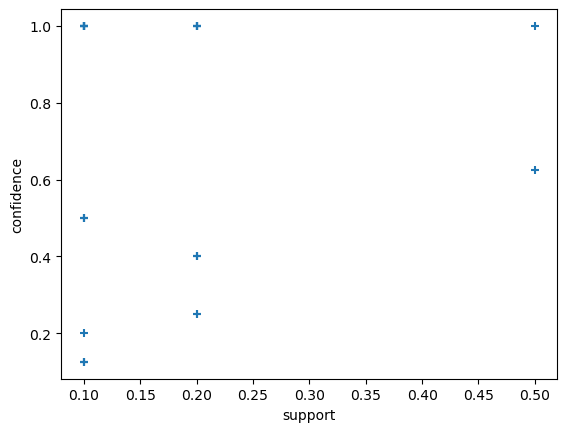

In [19]:
## Without jitter
plt.scatter(rules.support, rules.confidence,alpha=1, marker="+")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [ ]:
len(support)

26

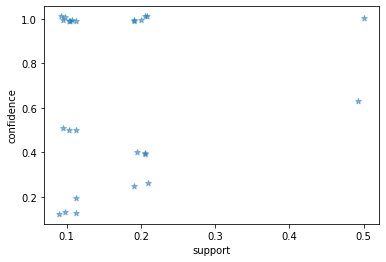

In [17]:
## With jitter
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
plt.scatter(support, confidence,alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## Case study - 2 (Store Data)

#### Read transaction data

In [20]:
FILE_PATH = 'store_data.csv'

In [21]:
dataset = []
with open(FILE_PATH) as fp: 
    for line in fp:
        dataset.append(line.strip().split(','))
print(len(dataset))
print(dataset[:4])

len(support)

7501
[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado']]


26

In [22]:
dataset = []
with open(FILE_PATH) as fp: 
    for line in fp:
        dataset.append([i.strip() for i in line.strip().split(',')])
print(len(dataset))
print(dataset[:4])

len(support)

7501
[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado']]


26

In [40]:
dataset[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

#### Generating Frequent Itemsets

* The `apriori` function expects data in a `one-hot encoded` __pandas DataFrame__. 

#### `TransactionEncoder`

Transform into one-hot encoded pandas DataFrame 

In [23]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [24]:
te = TransactionEncoder()
te_fit = te.fit(dataset)
te_ary = te_fit.transform(dataset)

In [25]:
print(type(te.columns_))
print(te.columns_)
print(len(te.columns_))

print(type(te_ary))
print(te_ary)

<class 'list'>
['almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 'gluten free bar', 'grated cheese', 'green beans', 'green grapes', 'green tea', 'ground beef', 'gums', 'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs', 'ketchup', 'light cream', 'light mayo', 'low fat yogurt', 'magazines', 'mashed potato', 'mayonnaise', 'meatballs', 'melons', 'milk', 'mineral w

In [26]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Get frequent itemsets from a one-hot DataFrame

* __Apriori__ is a popular algorithm for __extracting__ `frequent itemsets` with applications in association rule learning. 
* The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. 

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)

In [27]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

Returns pandas DataFrame with columns ['support', 'itemsets'] of all itemsets that are `>=` __min_support__ and `<` than __max_len__ (if max_len is not None).

In [28]:
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


Retain only itemsets of length 2 that have a support of at least 0.05. 

In [29]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


Select the results that satisfy our desired criteria

In [30]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
25,0.052660,"(chocolate, mineral water)",2
26,0.050927,"(mineral water, eggs)",2
27,0.059725,"(spaghetti, mineral water)",2


#### Association Rules Generation from Frequent Itemsets

The `generate_rules` takes __dataframes__ of `frequent itemsets` as produced by the `apriori` or `fpgrowth` functions in mlxtend.association.

The `generate_rules()` function allows you to specify your `metric` of interest and the according `threshold`. 

In [31]:
from mlxtend.frequent_patterns import association_rules

#rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.loc[:,["antecedents","consequents","support","confidence","lift"]]

rules

,antecedents,consequents,support,confidence,lift
0,(chocolate),(mineral water),0.052660,0.321400,1.348332
1,(mineral water),(chocolate),0.052660,0.220917,1.348332
2,(mineral water),(eggs),0.050927,0.213647,1.188845
3,(eggs),(mineral water),0.050927,0.283383,1.188845
4,(spaghetti),(mineral water),0.059725,0.343032,1.439085
5,(mineral water),(spaghetti),0.059725,0.250559,1.439085


Pandas DataFrames make it easy to filter the results further. Let's say we are ony interested in rules that satisfy the following criteria:

* at least 1 antecedents
* a confidence > 0.20
* a lift score > 1.2

We could compute the antecedent length as follows:

In [32]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules = rules.loc[:,["antecedents","consequents","support","confidence","lift","antecedent_len"]]

rules

,antecedents,consequents,support,confidence,lift,antecedent_len
0,(chocolate),(mineral water),0.052660,0.321400,1.348332,1
1,(mineral water),(chocolate),0.052660,0.220917,1.348332,1
2,(mineral water),(eggs),0.050927,0.213647,1.188845,1
3,(eggs),(mineral water),0.050927,0.283383,1.188845,1
4,(spaghetti),(mineral water),0.059725,0.343032,1.439085,1
5,(mineral water),(spaghetti),0.059725,0.250559,1.439085,1


 `pandas` selection syntax as shown below:

In [33]:
rules[ (rules['antecedent_len'] >= 1) &
       (rules['confidence'] > 0.20) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,support,confidence,lift,antecedent_len
0,(chocolate),(mineral water),0.052660,0.321400,1.348332,1
1,(mineral water),(chocolate),0.052660,0.220917,1.348332,1
4,(spaghetti),(mineral water),0.059725,0.343032,1.439085,1
5,(mineral water),(spaghetti),0.059725,0.250559,1.439085,1


Similarly, using the Pandas API, we can select entries based on the "antecedents" or "consequents" columns:

In [34]:
rules[rules['antecedents'] == {'chocolate'}]

,antecedents,consequents,support,confidence,lift,antecedent_len
0,(chocolate),(mineral water),0.05266,0.3214,1.348332,1


Write rules to a csv file.

In [35]:
rules.to_csv('output_arules.csv')

### Learning Outcomes
* Be able understand how to use mlxtend for Association Rule Mining
    * Be able to read transaction data in the format of list of list
    * Be able to generate Frequent Itemsets
        * Be able to transform into one-hot encoded pandas DataFrame
        * Be able to get frequent itemsets from a one-hot DataFrame
    * Be able to generate Association Rules from Frequent Itemsets
    * Be able to select entries based on the antecedents or consequents or antecedents length